In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [59]:
df = pd.read_csv("../restaurant_data.csv", index_col="oi_id")
df = df.rename(columns={"datetime": "order_datetime"})
df.order_datetime = pd.to_datetime(df.order_datetime)
df.dtypes

quantity                   int64
order_datetime    datetime64[ns]
product_name              object
product_price            float64
dtype: object

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

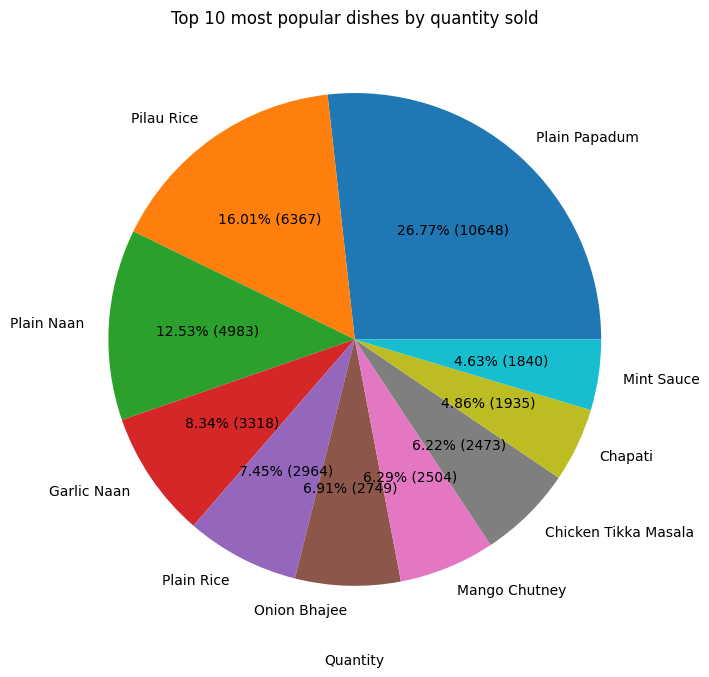

In [60]:
quantities = df.groupby(df.product_name)["quantity"].sum().sort_values(ascending=False)[:10]

quantities.plot.pie(
    subplots=True, 
    autopct=lambda p: "{:.2f}% ({:.0f})".format(p, (p / 100) * quantities.sum()),
    figsize=(8, 8),
)
plt.title("Top 10 most popular dishes by quantity sold")
plt.xlabel("Quantity")
plt.ylabel("")

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

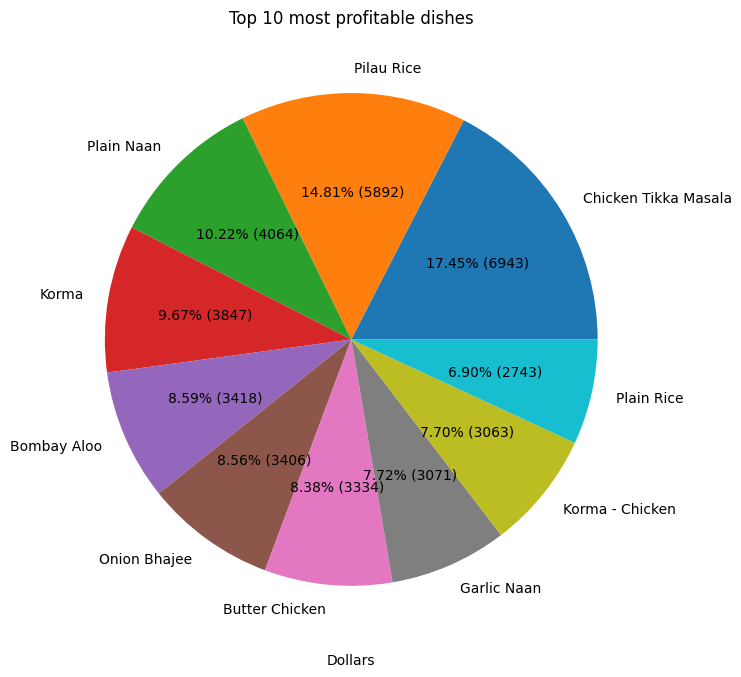

In [61]:
df["item_price"] = df["quantity"] * df["product_price"]
revenues = df.groupby(df.product_name)["item_price"].sum().sort_values(ascending=False)[:10]
revenues.plot.pie(
    subplots=True, 
    autopct=lambda p: "{:.2f}% ({:.0f})".format(p, (p / 100) * quantities.sum()),
    figsize=(8, 8)
)
plt.title("Top 10 most profitable dishes")
plt.xlabel("Dollars")
plt.ylabel("")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

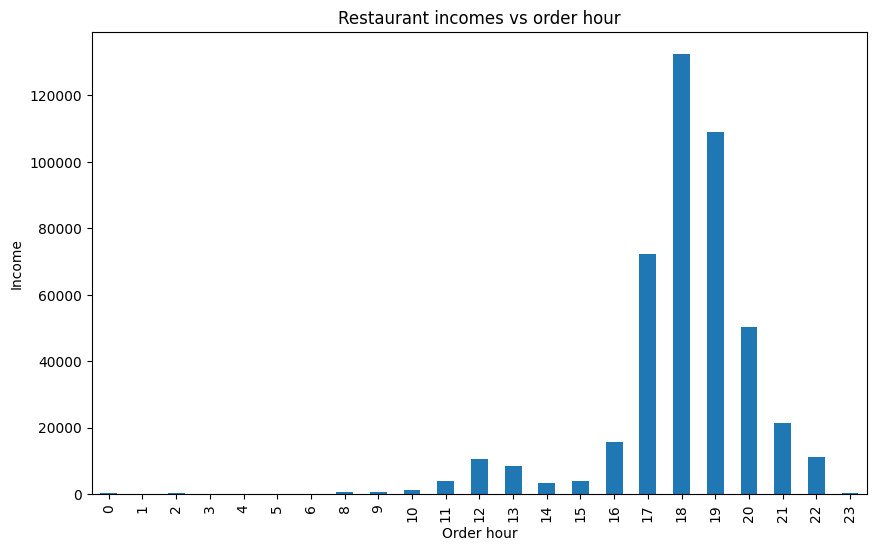

In [67]:
df["order_hour"] = df["order_datetime"].dt.hour
hour_incomes = df.groupby(df.order_hour)["item_price"].sum()
hour_incomes.plot(kind="bar", figsize=(10, 6))
plt.title("Restaurant incomes vs order hour")
plt.xlabel("Order hour")
plt.ylabel("Income")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

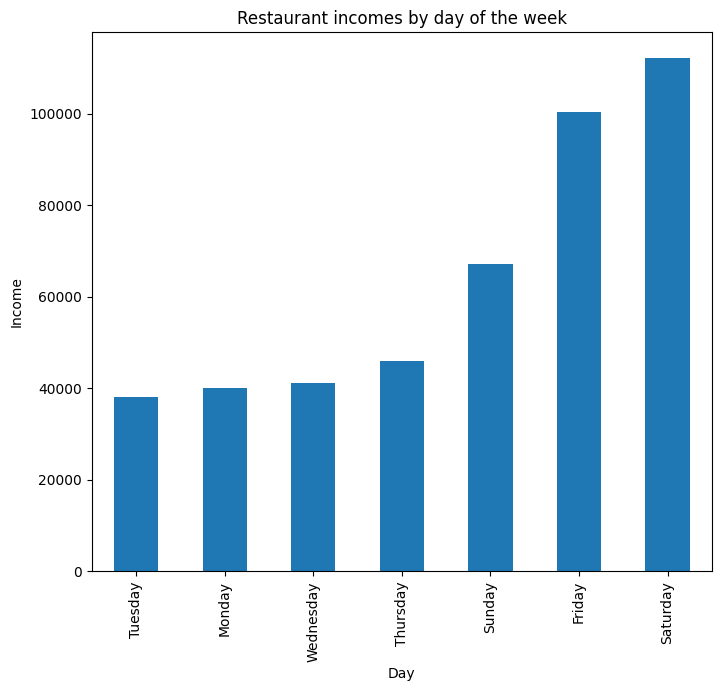

In [91]:
df["order_day"] = df.order_datetime.dt.day_name()
day_incomes = df.groupby(df.order_day)["item_price"].sum().sort_values()
day_incomes.plot(kind="bar", figsize=(8, 7))
plt.title("Restaurant incomes by day of the week")
plt.xlabel("Day")
plt.ylabel("Income")
plt.show()